<img src ='Pic\aivn.png' width='200px'>

# DEMO: CÁC BƯỚC XÂY DỰNG MỘT MÔ HÌNH HỌC MÁY
---

**Các bước để xây dựng một mô hình học máy nói chung:**

<img src='pic/step.png' width='700px'>

**<h4>1.Thu thập dữ liệu (Data collection)</h4>**
**<h4>2.Chuẩn bị dữ liệu (Data preparation)</h4>**
**<h4>3.Lựa chọn mô hình phù hợp (Choosing a model)</h4>**
**<h4>4.Huấn luyện mô hình (Training)</h4>**
**<h4>5.Đánh giá mô hình (Evaluation)</h4>**
**<h4>6.Tùy chỉnh tham số của mô hình (Parameter tuning)</h4>**
**<h4>7.Dự đoán với với mô hình xây dựng được (Prediction)</h4>**

---
Copyright @dangvannam - FIT.HUMG

**Mô tả bài toán:**
- Xây dựng mô hình học máy dự đoán khả năng mắc bệnh tim của những bệnh nhân bị chứng đau ngực với các thông số liên quan.
<img src='pic/heartattack.png' width='200px'>

## Bước 1.Thu thập dữ liệu (Data collection):
---

    Đây là bước đầu tiên trong vòng đời của một dự án học máy. Mục tiêu của bước này là thu thập tất cả các dữ liệu liên quan đến bài toán.  Dữ liệu có thể được thu thập từ nhiều nguồn khác nhau như *files, database, internet, mobile devices...* 
    Chất lượng và số lượng dữ liệu thu thập được sẽ quyết định đến chất lượng của kết quả đầu ra. Dữ liệu càng nhiều thì độ chính xác của mô hình càng cao. 
    Bước này bao gồm các công việc:
    - Xác định các nguồn dữ liệu liên quan đến bài toán
    - Thu thập các dữ liệu từ các nguồn này
    - Tích hợp các dữ liệu thu thập được để tạo thành một tập dữ liệu nhất quán (Dataset) sử dụng cho các bước tiếp theo./
    

**Mô tả tập dữ liệu thu thập được phục vụ bài toán:**
- Tên Dataset: **Data_Patient.csv**
- File dữ liệu chứa thông tin của **300 bệnh nhân bị bệnh đau ngực**
- Mỗi dòng ứng với thông tin của một bệnh nhân, bao gồm 9 thuộc tính:
     - *id: Mã của bệnh nhân (object)*
     - *Age: Tuổi của bệnh nhân (số)*
     - *Gender: Giới tính của bệnh nhân (chuỗi: Male – Female)*
     - *Type: Cho biết loại triệu chứng đau ngực mà bệnh nhân này mắc phải, với 4 giá trị: (Typical angina, Atypical angina, Non-anginal pain, Asymptomatic)*
     - *Blood_pressure: Huyết áp của bệnh nhân – đơn vị: mmhg (số)*
     - *Cholesterol: Chỉ số cholesterol của bệnh nhân – đơn vị: mg/dl (số)*
     - *Heatbeat: Thông số nhịp tim của bệnh nhân – đơn vị: lần/phút (số)*
     - *Thalassemia: Chỉ số Thalassemia của bệnh nhân chỉ gồm 3 giá trị (3: Bình thường | 4: Khiếm khuyết cố định | 7: Kiếm khuyết có thể đảo ngược)*
     - *Result: Cho biết bệnh nhân có bị bệnh tim hay không? (0: Không bị bệnh tim mạch | 1: Bị bệnh tim mạch)*
<img src = 'pic/data.png' width='450px'>

In [1]:
#Đọc tập dữ liệu dataset
import pandas as pd
df_patient = pd.read_csv('data/Data_patient.csv', index_col=0)
df_patient.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, Patient_01 to Patient_300
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             300 non-null    int64  
 1   Gender          300 non-null    object 
 2   Type            295 non-null    object 
 3   Blood_pressure  300 non-null    int64  
 4   Cholesterol     300 non-null    int64  
 5   Heartbeat       300 non-null    int64  
 6   Thalassemia     293 non-null    float64
 7   Result          300 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 21.1+ KB


In [2]:
#hiển thị 5 dòng dữ liệu đầu tiên
df_patient.head()

,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Thalassemia,Result
id,,,,,,,,
Patient_01,63,Male,Typical angina,145,233,150,6.0,0
Patient_02,67,Male,Asymptomatic,160,286,108,3.0,1
Patient_03,67,Male,Asymptomatic,120,229,129,7.0,1
Patient_04,37,Male,Non-anginal pain,130,250,187,3.0,0
Patient_05,41,Female,Atypical angina,130,204,172,NaN,0


In [3]:
#hiển thị 5 dòng dữ liệu cuối cùng
df_patient.tail()

,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Thalassemia,Result
id,,,,,,,,
Patient_296,59,Male,Asymptomatic,164,176,90,6.0,1
Patient_297,57,Female,Asymptomatic,140,241,123,7.0,1
Patient_298,45,Male,Typical angina,110,264,132,7.0,1
Patient_299,68,Male,Asymptomatic,144,193,141,7.0,1
Patient_300,57,Male,Asymptomatic,130,131,115,7.0,1


## Bước 2: Chuẩn bị dữ liệu (Data Preparation)
---
    Thông thường dữ liệu thu thập được có rất nhiều nhiễu (noise), dữ liệu thiếu (missing value), dữ liệu ngoại lai (outlierS)...dó đó dữ liệu cần phải được làm sạch và chuẩn hóa về dạng phù hợp. Đây là giai đoạn chiếm nhiều thời gian và nguồn lực nhất của một dự án ML.

<img src='pic/preparation.png' width='300px'>
    
    Có rất nhiều nhiệm vụ phải thực hiện trong quá trình chuẩn bị dữ liệu. Một số vấn đề cơ bản cần giải quyết trong giai đoạn này bao gồm:
* Khám phá dữ liệu
* Làm sạch dữ liệu (xử lý giá trị thiếu, giá trị ngoại lai)
* Tích hợp dữ liệu
* Biến đổi, rời rạc hóa và chuẩn hóa dữ liệu
* Cân bằng dữ liệu.
* Rút gọn thuộc tính.

### 2.1) Quan sát và khám phá tập dữ liệu
---
Thực hiện quan sát các đặc trưng thống kê, các biểu đồ liên quan đến tập dữ liệu để hiểu dữ liệu.

In [4]:
#khám phá tập dữ liệu 
#1. Quan sát Các thuộc tính số
df_patient.describe()

,Age,Blood_pressure,Cholesterol,Heartbeat,Thalassemia,Result
count,300.000000,300.000000,300.000000,300.000000,293.000000,300.00000
mean,54.490000,131.686667,247.070000,149.563333,4.781570,0.46000
std,9.032267,17.682498,51.835136,22.818595,1.944452,0.49923
min,29.000000,94.000000,126.000000,71.000000,3.000000,0.00000
25%,48.000000,120.000000,211.000000,133.750000,3.000000,0.00000
50%,56.000000,130.000000,242.500000,152.500000,3.000000,0.00000
75%,61.000000,140.000000,275.250000,165.250000,7.000000,1.00000
max,77.000000,200.000000,564.000000,202.000000,7.000000,1.00000


In [5]:
#1. Quan sát Các thuộc tính số
df_patient.describe(include='O')

,Gender,Type
count,300,295
unique,2,4
top,Male,Asymptomatic
freq,205,139


0    162
1    138
Name: Result, dtype: int64


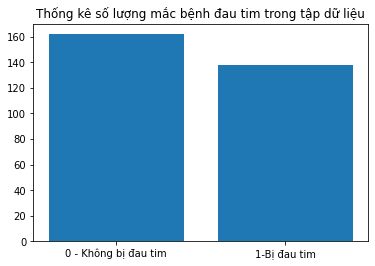

In [6]:
#Thống kê số lượng bệnh nhân đau ngực bị bệnh đau tim
kq = df_patient['Result'].value_counts()
print(kq)
#----------------------------------------------
#trực quan hóa kết quả
import matplotlib.pyplot as plt
plt.bar(['0 - Không bị đau tim','1-Bị đau tim'],kq.values)
plt.title('Thống kê số lượng mắc bệnh đau tim trong tập dữ liệu')
plt.show()

Male      205
Female     95
Name: Gender, dtype: int64


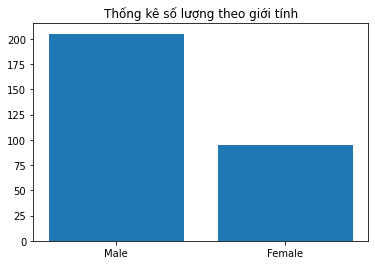

In [7]:
#Thống kê dữ liệu theo giới tính
kq_gender = df_patient['Gender'].value_counts()
print(kq_gender)
#----------------------------------------------
#trực quan hóa kết quả
import matplotlib.pyplot as plt
plt.bar(kq_gender.index,kq_gender.values)
plt.title('Thống kê số lượng theo giới tính')
plt.show()

### 2.2) Phát hiện và xử lý dữ liệu thiếu trong Dataset
---
Nếu dữ liệu có chứa các giá trị thiếu (null - missing) nó sẽ gây ra vấn đề lớn cho các model học máy. Do đó, quá trình chuẩn bị dữ liệu phải tìm ra các giá trị thiếu trong tập dữ liệu và xử lý chúng. 


In [8]:
#Kiểm tra dữ liệu thiếu trong Dataset
df_patient.isnull().sum()


Age               0
Gender            0
Type              5
Blood_pressure    0
Cholesterol       0
Heartbeat         0
Thalassemia       7
Result            0
dtype: int64

In [9]:
#Các dòng dữ liệu chứa missing của thuộc tính Type
df_patient.loc[df_patient[['Type']].isnull().any(axis=1)]

,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Thalassemia,Result
id,,,,,,,,
Patient_206,58,Male,NaN,128,259,130,7.0,1
Patient_219,59,Male,NaN,138,271,182,3.0,0
Patient_251,58,Male,NaN,146,218,105,7.0,1
Patient_271,66,Male,NaN,160,228,138,6.0,0
Patient_293,63,Male,NaN,140,187,144,7.0,1


In [10]:
#Các dòng dữ liệu chứa missing của thuộc tính Type
df_patient.loc[df_patient[['Thalassemia']].isnull().any(axis=1)]

,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Thalassemia,Result
id,,,,,,,,
Patient_05,41,Female,Atypical angina,130,204,172,NaN,0
Patient_21,64,Male,Typical angina,110,211,144,NaN,0
Patient_36,42,Male,Asymptomatic,140,226,178,NaN,0
Patient_241,41,Female,Atypical angina,126,306,163,NaN,0
Patient_266,52,Male,Asymptomatic,128,204,156,NaN,1
Patient_278,57,Male,Atypical angina,154,232,164,NaN,1
Patient_294,63,Female,Asymptomatic,124,197,136,NaN,1


**Có 2 thuộc tính chứa giá trị null trong Dataset**

1) Thuộc tính Type: có 5 giá trị missing

2) Thuộc tính Thalassemia: Chứa 7 giá trị missing

---
Có rất nhiều phương pháp xử lý missing, tùy thuộc vào từng loại dữ liệu cụ thể để lựa chọn phương án xử ly phù hợp. Hình dưới đây chỉ ra các phương pháp chính có thể lựa chọn trong việc xử lý giá trị missing.
<img src ='pic/handlingmissing.png' width='400px'>

Với bài 2 thuộc tính này sử dụng phương pháp thay thế giá trị thiếu bằng giá trị xuất hiện nhiều nhất (mode) của thuộc tính đó.

In [11]:
#Thống kê giá trị khác nhau của thuộc tính Type
# để xác định thuộc tính xuất hiện nhiều nhất trong tập dữ liệu
df_patient['Type'].value_counts()

Asymptomatic        139
Non-anginal pain     84
Atypical angina      49
Typical angina       23
Name: Type, dtype: int64

In [12]:
#Thống kê giá trị khác nhau của thuộc tính Thalassemia
#Để xác định thuộc tính xuất hiện nhiều nhất trong tập dữ liệu
df_patient['Thalassemia'].value_counts()

3.0    158
7.0    117
6.0     18
Name: Thalassemia, dtype: int64

**Với Thuộc tính Type:**
Giá trị Asymptomatic xuất hiện nhiều nhất trong tập dữ liệu với 139 lần. Thay thế 5 giá trị thiếu của thuộc tính Type bằng giá trị 'Asymptomatic'.

---
**Với Thuộc tính Thalassemia:**
Giá trị 3 xuất hiện nhiều nhất trong tập dữ liệu với 158 lần. Thay thế 7 vị trí giá trị thiếu của thuộc tính Thalassemia bằng giá trị 3.


In [13]:
#Thực hiện thay thế giá trị thiếu bằng giá trị xuất hiện nhiều nhất (mode)
df_patient['Type'].fillna('Asymptomatic', inplace=True)
df_patient['Thalassemia'].fillna(3.0, inplace=True)
df_patient.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, Patient_01 to Patient_300
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             300 non-null    int64  
 1   Gender          300 non-null    object 
 2   Type            300 non-null    object 
 3   Blood_pressure  300 non-null    int64  
 4   Cholesterol     300 non-null    int64  
 5   Heartbeat       300 non-null    int64  
 6   Thalassemia     300 non-null    float64
 7   Result          300 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 21.1+ KB


**Như vậy, sau khi xử lý giá trị thiếu với thuộc tính Type và Thalassemia, tập dữ liệu đã đầy đủ không bị missing giá trị nào.**

### 2.3) Mã hóa dữ liệu liệu Categorical (Encoding Categorical Data)
---

Các loại dữ liệu trong Dataset:
    - Numerical data: Giá nhà, nhiệt độ, thông số chiều cao, cân nặng, tuổi...(dữ liệu số)
    - Categorical data: tên người, địa chỉ, Yes/No, True/Flase, Male/Female....(dữ liệu chuỗi, boolean)
 
 Các mô hình học máy hoàn toàn làm việc trên các phép toán và xử lý dữ liệu số, nên nếu dữ liệu có chứa thuộc tính có kiểu Categorical sẽ phát sinh các vấn đề. Vì vậy, cần phải mã hóa các dữ liệu này thành dữ liệu số.
 
<img src='pic/encoding.png' width='400px'>

In [14]:
df_patient.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, Patient_01 to Patient_300
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             300 non-null    int64  
 1   Gender          300 non-null    object 
 2   Type            300 non-null    object 
 3   Blood_pressure  300 non-null    int64  
 4   Cholesterol     300 non-null    int64  
 5   Heartbeat       300 non-null    int64  
 6   Thalassemia     300 non-null    float64
 7   Result          300 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 21.1+ KB


In [15]:
df_patient.head()

,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Thalassemia,Result
id,,,,,,,,
Patient_01,63,Male,Typical angina,145,233,150,6.0,0
Patient_02,67,Male,Asymptomatic,160,286,108,3.0,1
Patient_03,67,Male,Asymptomatic,120,229,129,7.0,1
Patient_04,37,Male,Non-anginal pain,130,250,187,3.0,0
Patient_05,41,Female,Atypical angina,130,204,172,3.0,0


In [16]:
#Liệt kê các giá trị của thuộc tính Gender |Type
print('1. Thuộc tính Gender:', df_patient['Gender'].unique())
print('2. Thuộc tính Type:', df_patient['Type'].unique())

1. Thuộc tính Gender: ['Male' 'Female']
2. Thuộc tính Type: ['Typical angina' 'Asymptomatic' 'Non-anginal pain' 'Atypical angina']


In [17]:
#Trong tập dữ liệu có 2 thuộc tính: Gender và Type có kiểu dữ liệu Categorical
#Thực hiện chuyển đổi cho 2 thuộc tính này
convert_gender = {'Male':0,'Female':1}
convert_type = {'Typical angina': 1,
                'Asymptomatic':2,
                'Non-anginal pain':3,
                'Atypical angina':4}
df_patient['Gender']=df_patient['Gender'].map(convert_gender).astype(int)
df_patient['Type']=df_patient['Type'].map(convert_type).astype(int)
df_patient.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, Patient_01 to Patient_300
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             300 non-null    int64  
 1   Gender          300 non-null    int32  
 2   Type            300 non-null    int32  
 3   Blood_pressure  300 non-null    int64  
 4   Cholesterol     300 non-null    int64  
 5   Heartbeat       300 non-null    int64  
 6   Thalassemia     300 non-null    float64
 7   Result          300 non-null    int64  
dtypes: float64(1), int32(2), int64(5)
memory usage: 18.8+ KB


In [18]:
df_patient.head()

,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Thalassemia,Result
id,,,,,,,,
Patient_01,63,0,1,145,233,150,6.0,0
Patient_02,67,0,2,160,286,108,3.0,1
Patient_03,67,0,2,120,229,129,7.0,1
Patient_04,37,0,3,130,250,187,3.0,0
Patient_05,41,1,4,130,204,172,3.0,0


**Sau khi xử lý các thuộc tính của tập dữ liệu chỉ còn lại dữ liệu số**

### 2.4) Trích xuất các biến phụ thuộc và biến độc lập (Extracting dependent and independent variables)
---
Trong học máy, vấn đề quan trọng là phải phân biệt được ma trận các đặc trưng (biến độc lập) và biến phụ thuộc từ tập dữ liệu. 
    - Biến độc lập ---> các đặc trưng (feature - X)
    - Biến phụ thuộc ---> Target - y
<img src='pic/samples-features.png'>
Với ví dụ này, để xác định xem một người có bị đau tim hay không sẽ dựa vào các thông số tuổi, giới tính, loại triệu chứng đau ngực, huyết áp, cholesterol, Nhịp tim, Thalassemia. Như vậy: biến độc lập bao gồm (Age, Gender, Type, Blood_pressua, Cholesterol, Heartbeat, Thalassemia) - Thường ký hiệu là X, biến phụ thuộc là Result - thường ký hiệu là y, kết quả một người có bị bệnh đau tim hay không (0-không bị | 1-bị bệnh) phụ thuộc vào các thông số tuổi, giới tính...

In [ ]:
#Xác định đặc trưng input
X = df_patient.iloc[:,0:7].values
X[:10]

In [ ]:
y=df_patient.iloc[:,-1].values
y[:10]

### 2.5) Tách tập dữ liệu Train - Test
---
Để chuẩn bị dữ liệu cho Model học máy, chúng ta sẽ thực hiện việc chia Dataset thành 2 tập:
- **Tập huấn luyện (Training Set)** bao gồm các điểm dữ liệu sử dụng trực tiếp trong việc xây dựng mô hình.
- **Tập kiểm tra (Test set)** gồm các dữ liệu được dùng để đánh giá hiệu quả của mô hình. Tập kiểm tra đại diện cho dữ liệu mà mô hình chưa từng thấy, có thể xuất hiện trong quá trình vận hành mô hình trên thực tế.

Đây là bước quan trọng và cần thiết trong quá trình chuẩn bị dữ liệu để chúng ta có thể nâng cao hiệu suất mô hình học máy của mình. Thực hiện huấn luyện mô hình với Tập huấn luyện sau đó, sử dụng mô hình huấn luyện được chạy với tập kiểm tra để đánh giá độ chính xác của mô hình học máy.

<img src='pic/splitdata1.png'>
Thông thường tỷ lệ tách 80% cho tập Training và 20% cho tập Test. Để đảm bảo tính phổ quát, dữ liệu kiểm tra không được sử dụng trong quá trình xây dựng mô hình. Điều kiện cần để một mô hình hiệu quả: Kết quả đánh giá trên tập huấn luyện và tập kiểm tra đều cao.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
print('1.Kích thước tập Training:', X_train.shape)
print('2.Kích thước tập Test:', X_test.shape)

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
X_test

## Bước 3: Lựa chọn mô hình học máy (Choosing a Model)
---
Có rất nhiều mô hình học máy khác nhau, mỗi mô hình phù hợp với từng bài toán, từng tập dữ liệu cụ thể,trong đó có 3 loại cơ bản: Phân lớp, hồi quy, phân cụm
<img src='pic/MLtype.png' width='700px' >

có hàng trăm thuật toán khác nhau, một số thuật toán cơ bản cần nắm được bao gồm:
<img src='pic/ML.png' width='400px'>

**Bài toán dự đoán bệnh ung thư:**
- *Bài toán này thuộc loại Học có giám sát (suppervised learning) - Vì dữ liệu của bài toán đã được gán nhãn (Thuộc tính Result: với 2 nhãn).*
- *Trong nhóm học máy có giám sát, bài toán thuộc bài toán phân lớp (Classification) - cụ thể là phân lớp nhị phân (2 lớp: 0|No - 1|Yes)*

Sử dụng thuật toán KNN cho bài toán này.

In [ ]:
#Khai báo sử dụng thuật toán KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Khai báo model KNN, với các tham số mặc định
KNN = KNeighborsClassifier()

## Bước 4: Huấn luyện mô hình (Training)
---

<img src='pic/LearnML.png' width='400px'>

- Các mô hình học máy sẽ học từ dữ liệu, và để cho máy học được chúng ta sẽ sử dụng tập huấn luyện (Training set) để cho máy học.

- Việc huấn luyện một mô hình học máy bản chất là tìm gia các tham số tối ưu cho thuật toán đó, sao cho độ chính xác của thuật toán là cao nhất.

<img src='pic/TrainingML.png' width='400px'>

In [ ]:
# Trong bước 3: chúng đã chuẩn bị được dữ liệu cho tập Train + Test
#Sử dụng tập Train cho huấn luyện: Feature = X_train | Outcome = y_train
#Phương thức fit() sử dụng để huấn luyện model
KNN.fit(X_train,y_train)
print(KNN)

#Độ chính xác của Model trên tập Huấn luyện
acc_train = KNN.score(X_train,y_train)
print('Độ chính xác trên tập huấn luyện:', round(acc_train*100,2))

### Bước 5: Đánh giá mô hình (Evaluation)
---
* Mô hình sau khi được huấn luyện với dữ liệu huấn luyện, cần phải được kiểm tra để đánh giá độ chính xác của mô hình. 

* Trong giai đoạn này sẽ sử dụng tập dữ liệu Test (Tập dữ liệu độc lập và Model chưa biết tới các dữ liệu này) để dự đoán với model thu được.

<img src='pic/evaluation.png' width='400px'>

In [ ]:
#Sử dụng tập dữ liệu test để chạy model dự đoán 
y_pred = KNN.predict(X_test)

#Kiểm tra độ chính xác của model trên tập dữ liệu test
from sklearn.metrics import accuracy_score
print("Độ chính xác của mô hình KNN trên tập Test:", 
      round(accuracy_score(y_test,y_pred)*100,2))

In [ ]:
print('y_test:',y_test[:10])
print('---------------------------------------')
print('y_pred:',y_pred[:10])

Khi xây dựng mỗi mô hình học máy, chúng ta cần phải chú ý hai vấn đề: Overfitting (quá khớp) và Underfitting (chưa khớp). Đây chính là nguyên nhân chủ yếu khiến mô hình có độ chính xác thấp.
<img src='pic/Overfitting.png' width='400px'>

* **Overfitting** là hiện tượng mô hình tìm được quá khớp với dữ liệu training. Việc quá khớp này có thể dẫn đến việc dự đoán nhầm nhiễu, và chất lượng mô hình không còn tốt trên dữ liệu test nữa. Dữ liệu test được giả sử là không được biết trước, và không được sử dụng để xây dựng các mô hình Machine Learning.

* **Underfitting** (chưa khớp) là hiện tượng khi mô hình xây dựng chưa có độ chính xác cao trong tập dữ liệu huấn luyện cũng như tổng quát hóa với tổng thể dữ liệu. Khi hiện tượng Underfitting xảy ra, mô hình đó sẽ không phải là tốt với bất kì bộ dữ liệu nào trong vấn đề đang nhắc tới. Hiện tượng Underfitting thường ít xảy ra trong bài toán hơn. Khi Underfitting xảy ra, ta có thể khắc phục bằng cách thay đổi thuật toán hoặc là bổ sung thêm dữ liệu đầu vào.

* **Good Fitting - Best fit** (vừa khớp) là nằm giữa Underfitting và Overfitting. Mô hình cho ra kết quả hợp lý với cả tập dữ liệu huấn luyện và các tập dữ liệu mới. Đây là mô hình lý tưởng mang được tính tổng quát và khớp được với nhiều dữ liệu mẫu và cả các dữ liệu mới. Good Fitting là mục tiêu của mỗi bài toán. Tuy nhiên, trên thực tế, vấn đề này rất khó thực hiện. Để tìm được điểm Good Fitting, ta phải theo dõi hiệu suất của thuật toán học máy theo thời gian khi thuật toán thực hiện việc học trên bộ dữ liệu huấn luyện. Ta có thể mô tả và thể hiện các thông số mô hình, độ chính xác của mô hình trên cả hai tập dữ liệu huấn luyện và đào tạo.

**Với bài toán này gặp trường hợp Overfitting, khi độ chính xác trên tập huấn luyện cao (Error nhỏ) thì độ chính xác trên tập test giảm (Error tăng)**

- Train: Accuracy = 74.17% (Error = 25.83%)
- Test:  Accuracy = 60.00% (Error = 40.00%)

--------------------------------------------
- Train = 77.08% (Error = 22.08%)
- Test  = 56.67% (Error = 44.33%)

## Bước 6: Tùy chỉnh tham số của mô hình (Parameter tuning)
---
Bản chất của việc học là tìm ra tham số phù hợp với model sao cho độ chính xác đạt đến ngưỡng chấp nhận được. Khi 

<img src='pic/TuningParameter.png' width='400px'>

In [ ]:
#Ví dụ với thuật toán KNN có các tham số:
# KNeighborsClassifier(n_neighbors=5, 
#                    weights='uniform', 
#                    algorithm='auto', 
#                    leaf_size=30, 
#                    p=2, 
#                    metric='minkowski', 
#                    metric_params=None, 
#                    n_jobs=None)
#Việc Tuning tham số là việc xác định tham số nào là tốt nhất cho model với dữ liệu hiện tại sao cho
#sao cho độ chính xác của model trên cả tập huẩn luyện và tập kiểm tra đề cao (best fit)

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=9,
                          weights = 'distance',
                          algorithm='ball_tree',
                          p=3)
KNN.fit(X_train,y_train)
print(KNN)

#Độ chính xác của Model trên tập Huấn luyện
acc_train = KNN.score(X_train,y_train)
print('Độ chính xác trên tập huấn luyện:', round(acc_train*100,2))

In [ ]:

#Sử dụng tập dữ liệu test để chạy model dự đoán 
y_pred = KNN.predict(X_test)

#Kiểm tra độ chính xác của model trên tập dữ liệu test
from sklearn.metrics import accuracy_score
print("Độ chính xác của mô hình KNN trên tập Test:", 
      round(accuracy_score(y_test,y_pred)*100,2))

In [ ]:
#Giả sử sau khi tùy chỉnh Model ta có một model với độ chính xác chấp nhận được.
#Lưu model đã xây dựng thành công để thực hiện dự đoán
import pickle
filename = 'model/ML_heartattack.sav'
pickle.dump(KNN, open(filename, 'wb'))
print('Đã lưu thành công!')

## Bước 7: Dự đoán với mô hình xây dựng được (Prediction)
---
Sau khi đã huấn luyện được model và kiểm thử trên tập dữ liệu test đạt độ chính xác chấp nhận được. Sử dụng model để dự đoán kết quả?

### Trường hợp 1:
---
<img src='pic/patient.jpg' width='400px'>
Giả sử một bệnh nhân số 1 bị chứng đau ngực có các thuộc tính liên quan như sau:

   - Tuổi (Age)               : 69
   - Giới tính (Gender)       : Male - 0
   - Loại đau ngực (Type)     : Atypical angina - 4
   - Huyết áp (Blood_pressure): 170
   - Cholesterol              : 300
   - Nhịp tim (Heartbeat)     : 150
   - Thalassemia              : 6
 
 *({'Male':0,'Female':1} | {'Typical angina': 1,'Asymptomatic':2,'Non-anginal pain':3,          'Atypical angina':4})*
 
**Mô hình dự đoán xem bệnh nhân này có khả năng bị đau tim hay không?**

In [ ]:
#load model đã lưu
import pickle
filemodel = 'model/ML_heartattack.sav'
KNN = pickle.load(open(filemodel, 'rb'))

In [ ]:
import numpy as np
patient_new1 =np.array([(69, 0, 4, 170, 300, 150, 6)])
#Thông tin của bệnh nhân mới --> Số
patient_new1

In [ ]:
#sử dụng model đã xây dựng để dự đoán với bệnh nhân số 1
patient_predict1 = KNN.predict(patient_new1)
if (patient_predict1==0):
    print('ML says: Thật tuyệt vời, Bạn không bị bệnh đau tim!^.^')
else:
    print('ML says: Thôi xong rồi, Bạn có khả năng bị bệnh đau tim!')

### Trường hợp 2:
---
<img src='pic/patient21.jpg' width='400px'>
Giả sử một bệnh nhân số 2 bị chứng đau ngực có các thuộc tính liên quan như sau:

   - Tuổi (Age)               : 40
   - Giới tính (Gender)       : Female - 1
   - Loại đau ngực (Type)     : Atypical pain - 4
   - Huyết áp (Blood_pressure): 110
   - Cholesterol              : 190
   - Nhịp tim (Heartbeat)     : 165
   - Thalassemia              : 3
 
 *({'Male':0,'Female':1} | {'Typical angina': 1,'Asymptomatic':2,'Non-anginal pain':3,          'Atypical angina':4})*
 
**Mô hình dự đoán xem bệnh nhân này có bị đau tim hay không?**

In [ ]:
patient_new2 =np.array([(40, 1, 4, 110, 190, 165, 3)])
#Thông tin của bệnh nhân mới 2 --> Số
patient_new2

In [ ]:
#sử dụng model đã xây dựng để dự đoán
patient_predict2 = KNN.predict(patient_new2)
if (patient_predict2==0):
    print('ML says: Thật tuyệt vời, Bạn không bị bệnh đau tim! ^.^')
else:
    print('ML says: Thôi xong rồi, Bạn có khả năng bị bệnh đau tim!')

<img src='pic/7step.jpg' width='400px'>
<a herf='https://www.youtube.com/watch?v=nKW8Ndu7Mjw&ab_channel=GoogleCloudPlatform'>Link Video!</a> 


copyright@dangvannam@2020